<a href="https://colab.research.google.com/github/efsasezer/Network-CiscoPacketTracer/blob/main/makine%C3%96%C4%9Frenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas kütüphanesini yükleme
import pandas as pd

from google.colab import files
uploaded = files.upload()



**Veri Setini Yükleme**

In [ ]:
# Excel dosyasını okuma
veri = pd.read_excel('makineveriseti(yeni).xlsx')
# Veriyi CSV dosyasına dönüştürme
veri.to_csv('veri.csv', index=False)  # index=False belirtilerek indeks sütunu kaydedilmez
veri = pd.read_csv('veri.csv', sep='\s+', header=None)
columnHeads = ["pregnant", "glucose", "blood","skinfold","serum","bki","Diabetes","age","diabet"]
veri.columns = columnHeads
veri.to_csv('veri.csv', index=False)
veri.head(10)

,pregnant,glucose,blood,skinfold,serum,bki,Diabetes,age,diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


 Normalde veri setimin 8 öznitelik ve 1 sonuç için  9 sütun 768 satırdan oluşması gerekiyordu. Ama ilk izlenimde gördüğümde  tek bir sütundan oluştuğunu fark ettim. Bu yüzden öncelikle xlsx dosyamı csv dosyasına dönüştürerek her boşlukta sütunlara ayrılmasını sağlatıp 9 sütuna ayırmış oldum. Başlıkları da header=None parametresini kullanarak sutunların başlıklarını kendim belirledim.Sonra ise veri.csv dosyamın yeni veri setimin kaydetmesini sağladım. veri değişkenine atadığım data setimi veri.head() diyerek ilk 20 satırın gösterdim.

In [12]:
# CSV dosyasını okuma ve sütunları boşluklarla ayırma
df = pd.read_csv('veri.csv')

# Veri çerçevesini görüntüleme
print(df)

     pregnant  glucose  blood  skinfold  serum   bki  Diabetes  age  diabet
0           6      148     72        35      0  33.6     0.627   50       1
1           1       85     66        29      0  26.6     0.351   31       0
2           8      183     64         0      0  23.3     0.672   32       1
3           1       89     66        23     94  28.1     0.167   21       0
4           0      137     40        35    168  43.1     2.288   33       1
..        ...      ...    ...       ...    ...   ...       ...  ...     ...
763        10      101     76        48    180  32.9     0.171   63       0
764         2      122     70        27      0  36.8     0.340   27       0
765         5      121     72        23    112  26.2     0.245   30       0
766         1      126     60         0      0  30.1     0.349   47       1
767         1       93     70        31      0  30.4     0.315   23       0

[768 rows x 9 columns]


In [13]:
# Diyabet hastası olanların sayısını bulma
diyabet_hastasi_sayisi = df[df['diabet'] == 1].shape[0]

print("Diyabet hastası olanların sayısı:", diyabet_hastasi_sayisi)

# Diyabet hastası olanların sayısını bulma
diyabet_hastasi_sayisi = df[df['diabet'] == 0].shape[0]

print("Diyabet hastası olmayanların sayısı:", diyabet_hastasi_sayisi)



Diyabet hastası olanların sayısı: 268
Diyabet hastası olmayanların sayısı: 500


768 tane verimin içerisinden 268 kişinin diyabet hastası olduğunu 500 kişinin hasta olmadığını görmüş oldum.

In [14]:
df.isna().sum()
# Datamız`da bmi sütununda 0 tane null veri var.

pregnant    0
glucose     0
blood       0
skinfold    0
serum       0
bki         0
Diabetes    0
age         0
diabet      0
dtype: int64

null değerlerini bulup yok etmek istediğimde null değeri olmadığını gördüm.Fakat eksik değerlerin sıfır değerleri ile kodlandığı düşünülmektedir. Bu yüzden 0 değerlerinin ortadan kalkması için en sık tekrarlanan değerle doldurma işlemi uygulayacağım. Veri setini **null_df** değişkenine atayıp ilerde uygulayacağım algoritmalarda karşılaştırma yapmama olanak sağlayacak.Dikkat ettiğim diğer şey ise diabet sütunumda yani verinin diabet hastası olup olmadığı belirttiğim sütunumda da 0 değeri var ama bu sütundaki 0 değerlerinin değişmemesi gerekmektedir.Çünkü buradaki 0 değişkeni kayıp veri değil hastalığa sahip olmadığını gösterir.

In [15]:
import numpy as np

null_df = df.copy()
# Diğer sütunlardaki 0 değerlerini NaN (eksik değer) olarak işaretle
null_df.iloc[:, :-1] = df.iloc[:, :-1].replace(0, np.nan)

# Eksik değerleri en sık tekrarlanan değerle doldur
null_df.fillna(df.mode().iloc[0], inplace=True)

# Diyabet sütunundaki 0 değerlerini tekrar 0 olarak ayarla
null_df['diabet'].replace(np.nan, 0, inplace=True)

# Yeni veri çerçevesini görüntüleme
print(null_df)


     pregnant  glucose  blood  skinfold  serum   bki  Diabetes  age  diabet
0         6.0    148.0   72.0      35.0    0.0  33.6     0.627   50       1
1         1.0     85.0   66.0      29.0    0.0  26.6     0.351   31       0
2         8.0    183.0   64.0       0.0    0.0  23.3     0.672   32       1
3         1.0     89.0   66.0      23.0   94.0  28.1     0.167   21       0
4         1.0    137.0   40.0      35.0  168.0  43.1     2.288   33       1
..        ...      ...    ...       ...    ...   ...       ...  ...     ...
763      10.0    101.0   76.0      48.0  180.0  32.9     0.171   63       0
764       2.0    122.0   70.0      27.0    0.0  36.8     0.340   27       0
765       5.0    121.0   72.0      23.0  112.0  26.2     0.245   30       0
766       1.0    126.0   60.0       0.0    0.0  30.1     0.349   47       1
767       1.0     93.0   70.0      31.0    0.0  30.4     0.315   23       0

[768 rows x 9 columns]


In [16]:
df.duplicated().sum()

0

Dublicated kodunun 0 çıkması, veri setindeki tam olarak aynı olan tekrar eden satırların olmadığını gösterir. Yani, hiçbir satır tamamen aynı değil ve veri setinizde tekrar eden veri yoktur. Bu durum, her bir satırın benzersiz olduğu anlamına gelir.

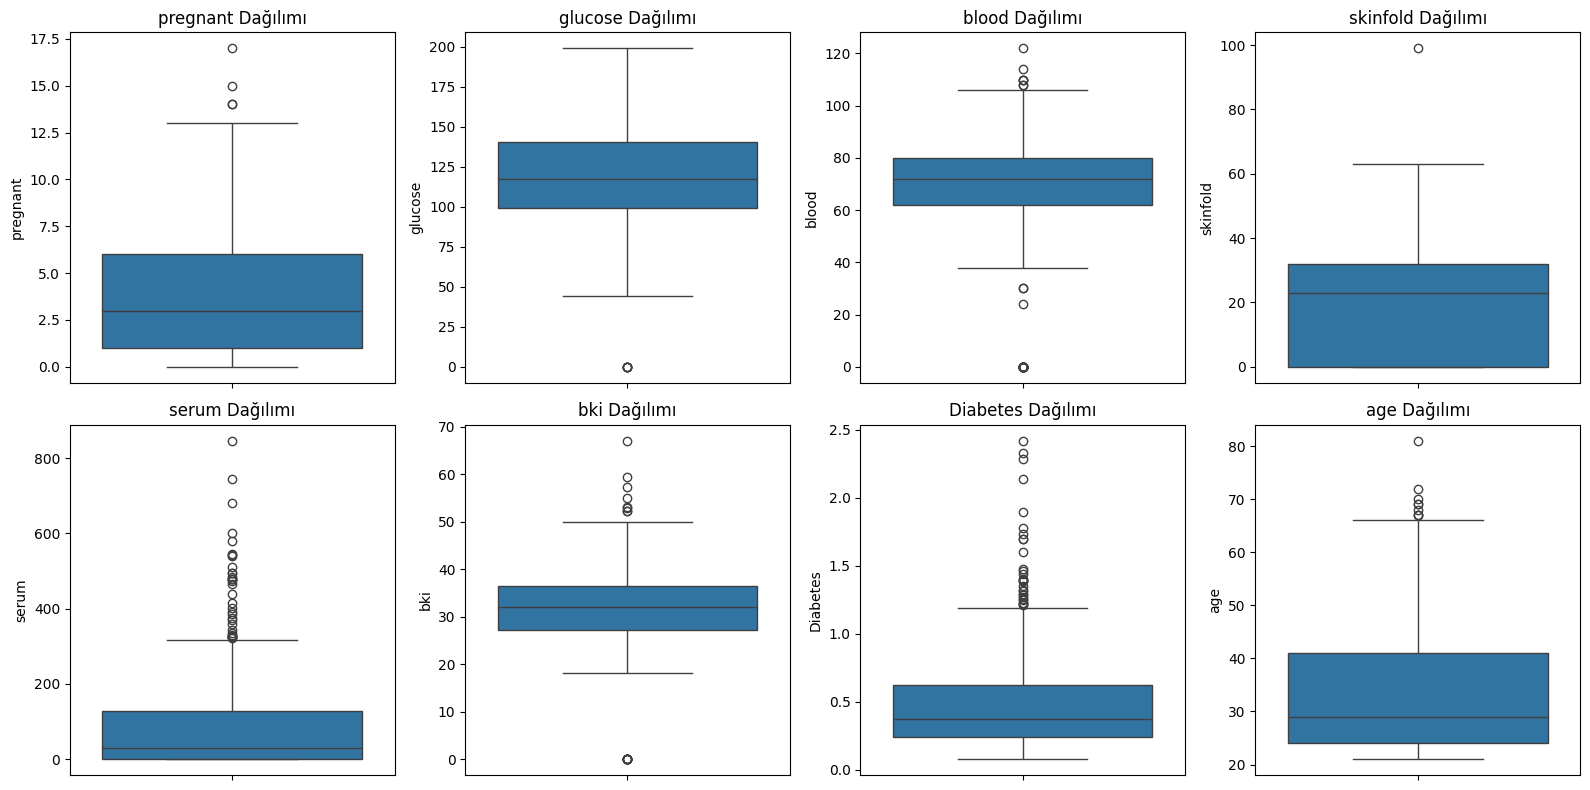

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(df, features):
    num_plots = len(features)
    num_rows = (num_plots + 3) // 4  # Her satırda 4 grafik olacak şekilde hesapla

    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(data=df, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} Dağılımı')
        axes[i].set_ylabel(feature)
        axes[i].set_xlabel(None)  # x ekseni etiketini kaldır

    # Boş grafikleri gizle
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Özniteliklerin listesi
features = ['pregnant', 'glucose', 'blood', 'skinfold', 'serum', 'bki', 'Diabetes', 'age']

# Her öznitelik için görselleştirme yapma
plot_feature_distribution(df, features)



Veri setinin görselleştirmesini sağlamak için boxplot kutu grafiği modelini kullandım. 2 saatlik serum insülini (mu U/ml) , diyabet soyağacı işlevinin uygulandığı özniteliklerin aykırı değerlerinin fazla olduğunu , glikoz ve Triceps deri kıvrım kalınlığı (mm) sütunlarının aykırı değerlerinin az olduğu gözlemledim.Boxplot grafiğinde çok sayıda aykırı değer varsa, bu genellikle veri setinin dağılımının daha değişken olduğunu ve belirli bir merkezi eğilimin etrafında daha geniş bir yayılım olduğunu gösterir. Ayrıca Bki değerinin olduğu sütunda boxplot daha dar olduğu için daha homojen olduğunu gösterirken, age gibi geniş bir boxplot daha fazla değişkenlik ve heterojenlik olduğunu gösterir.

**Normalizasyon İşlemi**

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Min-max normalizasyonu
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Normalizasyon sonrası veri seti
normalizedDf = pd.DataFrame(normalized_data, columns=df.columns)


Normalizasyon, veri setindeki özellikleri belirli bir aralığa dönüştürme işlemidir.Veri setini normalleştirmek için Min-Max normalizasyonu yöntemini kullanacağım. Bu yöntem, her bir özniteliğin değerlerini 0 ile 1 arasında ölçeklendirir.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# "diabet" sütununu çıkararak yeni bir veri çerçevesi oluşturma
df_without_target = df.drop(columns=['diabet'], errors='ignore')

# Min-max normalizasyonu
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df_without_target)

# PCA ve LDA için bileşen sayısını belirleme
n_components_pca = 2  # İki öz değer için boyut indirgeme
n_components_lda = min(len(df['diabet'].unique()) - 1, normalized_df.shape[1])  # Sınıf sayısından bir eksik

# PCA ve LDA modeli oluşturma
pca = PCA(n_components=n_components_pca)
lda = LDA(n_components=n_components_lda)

# Veri setine PCA ve LDA uygulanması
pca_transformed_data = pca.fit_transform(normalized_df)
lda_transformed_data = lda.fit_transform(normalized_df, df['diabet'] if 'diabet' in df.columns else None)

# PCA ve LDA için en ayırt edici özniteliklerin belirlenmesi
pca_explained_variance = pca.explained_variance_ratio_
lda_explained_variance = lda.explained_variance_ratio_

print("PCA için öz değerler:", pca_explained_variance)
print("LDA için öz değerler:", lda_explained_variance)


PCA için öz değerler: [0.31192249 0.21186663]
LDA için öz değerler: [1.]


Öncelikli olarak ayırt edici öznitelikleri belirlemek için hedef sütunumu yani hastalığa sahip olup olmadığını belirlediğim diabet sütununu çıkararak tekrar normalizasyon işlemi uyguladım ve bunun üzerinden pca lda algoritmalarını uyguladım.
Bu öz değerler, her bir yöntemin elde ettiği bileşenlerin toplam varyanstaki oranını gösterir. Örneğin, PCA için ilk bileşenin toplam varyansta %31.19'luk bir orana sahip olduğunu ve ikinci bileşenin %21.19'luk bir orana sahip olduğunu gördüm. LDA için ise tek bir bileşenin tüm varyansı açıkladığını gösteren 1.0 bir öz değer elde ettim.

In [20]:
# PCA bileşenlerinin ağırlıklarını alma
pca_components = pca.components_

# LDA bileşenlerinin ağırlıklarını alma
lda_components = lda.coef_


In [21]:
print("PCA'nın bileşenlerin ağırlıkları:", pca_components)
print("LDA bileşenlerinin ağırlıkları:", lda_components)


PCA'nın bileşenlerin ağırlıkları: [[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]]
LDA bileşenlerinin ağırlıkları: [[ 2.20574287  7.42343568 -1.79256943  0.09638944 -0.96236705  5.59954666
   2.17277766  0.99104565]]


PCA (Principal Component Analysis) ve LDA (Linear Discriminant Analysis), boyut azaltma ve veri sınıflandırma amacıyla kullanılan iki farklı yöntemdir. PCA, veri setindeki varyansı maksimize eden bileşenleri bulurken, LDA sınıflar arasındaki ayrımı maksimize etmeye odaklanır.Bu yüzden veri setindeki özniteliklerin ayırt ediciliğini belirlemek için PCA ve LDA'nın öznitelik ağırlıklarına baktım.

PCA'da ilk bileşenler genellikle veri setindeki en yüksek varyansı açıklayan öznitelikler olduğunu fark ettim ve bulduğum ağırlıkları kullanarak, hangi özniteliklerin en ayırt edici olduğunu belirledim. Ağırlıkların mutlak değerleri, özniteliklerin önemini gösterir. Daha yüksek mutlak değere sahip ağırlıklar, daha ayırt edici özniteliklere işaret ettiğini bilerek aşağıdaki sonuçları çıkarttım :
1.   Birinci bileşen için en yüksek ağırlıklar 0.652 ve 0.678 değerlerine sahiptir. Bu öznitelikler, birinci bileşende en büyük varyansın olduğu ve dolayısıyla veri setinde en büyük değişikliği yaratan özniteliklerdir. Özellikle 0.652 ve 0.678 değerlerine sahip olan öznitelikler, birinci bileşenin oluşumunda belirleyici rol oynar.
PCA'da ilk bileşende (birincil bileşen) pregnant ve age özniteliklerinin belirleyici rol oynadığı gördüm. Bu, bu özniteliklerin genel veri setindeki değişkenliği veya deseni önemli ölçüde açıkladığı anlamına gelir.
2.   İkinci bileşenin ağırlıklarına bakıldığında, özellikle dördüncü özniteliğin (0.59815466) ve beşinci özniteliğin (0.44736849) önemli olduğu gördüm.Yani deri kıvrım kalınlığı ve serum insülini değerlerinin ayırt edici öznitelik olduğunu gördüm.
3. LDA'da en ayırt edici özniteliklerin "glucose" ve "bki" olduğunu
söyleyebilirim. Bu öznitelikler, LDA'nın bileşenlerinde daha yüksek ağırlıklara sahiptir, yani sınıflar arasındaki ayrımı en iyi sağlarlar.


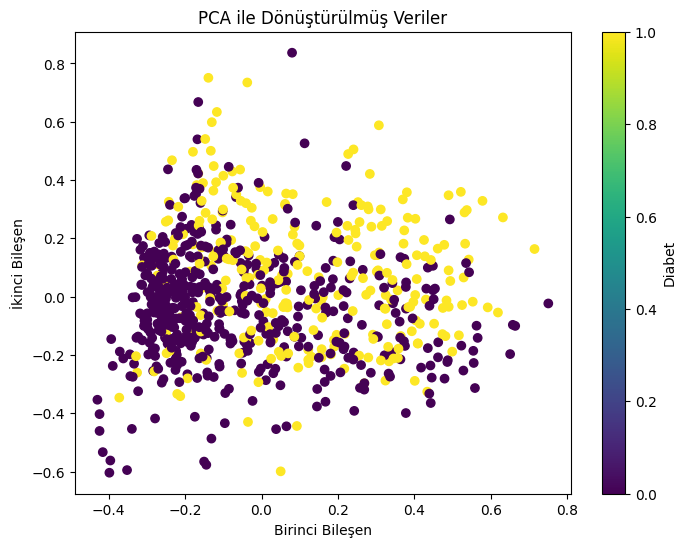

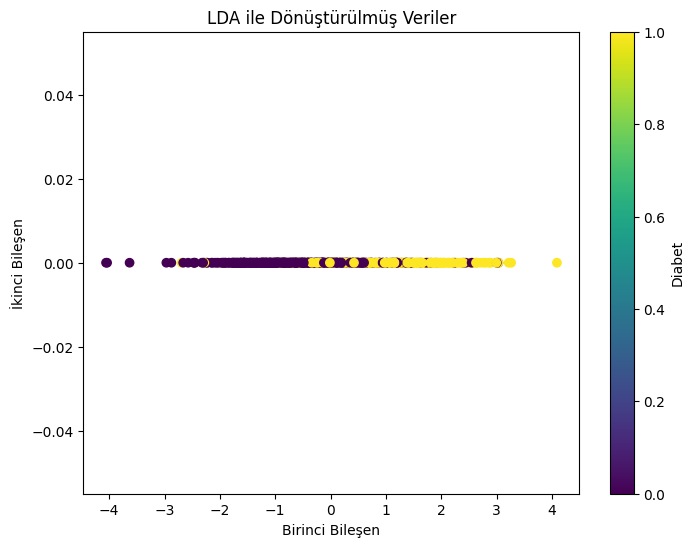

In [22]:
import matplotlib.pyplot as plt

# PCA dönüştürülmüş verilerin görselleştirilmesi
plt.figure(figsize=(8,6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=df['diabet'], cmap='viridis')
plt.title('PCA ile Dönüştürülmüş Veriler')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.colorbar(label='Diabet')
plt.show()

# LDA dönüştürülmüş verilerin görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(lda_transformed_data[:, 0], np.zeros_like(lda_transformed_data[:, 0]), c=df['diabet'], cmap='viridis')
plt.title('LDA ile Dönüştürülmüş Veriler')
plt.xlabel('Birinci Bileşen')
plt.ylabel('İkinci Bileşen')
plt.colorbar(label='Diabet')
plt.show()

**PCA ile Dönüştürülmüş Veriler:**

Sarı noktalar, hastalığı temsil ederken (1), mor noktalar hastalık olmamasını (0) temsil ediyor.
Mor noktaların genellikle birinci bileşen için -0.2 ile 0 arasında toplandığı gözlemledim.
Sarı noktalar ise biraz daha geniş bir alana yayılmış durumda, özellikle 0.0 ve daha büyük değerlerde daha yoğun bir şekilde bulunuyor.
Bu durum, PCA'nın hastalık ve sağlık durumunu birincil bileşen üzerinde ayırmada başarılı olduğunu gösteriyor.Grafikten önceki kodlarda da PCA'da birinci bileşen genellikle en fazla değişkenliği (varyansı) açıklayan bileşen olduğunu görmüştüm. Mor noktaların daha dar bir aralıkta toplanması, sağlıklı bireylerin benzer özelliklere sahip olduğunu ve bu nedenle daha küçük bir varyansla temsil edildiğini işaret ediyor. Sarı noktaların daha geniş bir alana yayılması, hastalıklı bireyler arasında daha büyük bir çeşitlilik olduğunu ve bu nedenle daha geniş bir varyansla temsil edildiklerini gösteriyor.

**LDA ile Dönüştürülmüş Veriler:**

Dönüştürülmüş verilerin grafiksel temsili düz bir yatay çizgi şeklinde.
Bu çizginin sol tarafındaki mor renk, hastalığı temsil ederken; sağ tarafındaki sarı renk, hastalık olmamasını temsil ediyor.
Mor ve sarı renkler net bir şekilde ayrılmış durumda.
Bu durum, LDA'nın hastalık ve sağlık durumunu net bir şekilde ayırt ettiğini gösteriyor. Düz yatay çizgi, veri setindeki sınıflar arasındaki ayrımı en iyi şekilde ifade eder. Mor ve sarı renklerin net bir şekilde ayrılması, LDA'nın veri setindeki sınıfları doğru bir şekilde ayırt ettiğini gösterir.




**İlk olarak, ana veri seti üzerinde regresyon analizlerini uyguladım:**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Veri setini bağımlı değişken ve bağımsız değişkenler olarak ayırma
X = df.drop(columns=['diabet'], errors='ignore')
y = df['diabet']

# Veri setini eğitim ve test setlerine böleme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_coefficients = linear_regression.coef_
print("Çoklu Doğrusal Regresyon Katsayıları (Ana Veri Seti):", linear_coefficients)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_coefficients = logistic_regression.coef_
print("Multinominal Lojistik Regresyon Katsayıları (Ana Veri Seti):", logistic_coefficients)

# Test seti üzerinde tahminler yapma
linear_predictions = linear_regression.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Çoklu Doğrusal Regresyon performansı
linear_accuracy = linear_regression.score(X_test, y_test)
print("Çoklu Doğrusal Regresyon Doğruluk (Ana Veri Seti):", linear_accuracy)

# Multinominal Lojistik Regresyon performansı
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Multinominal Lojistik Regresyon Doğruluk (Ana Veri Seti):", logistic_accuracy)


# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("R-Kare (Coefficient of Determination):", linear_regression.score(X_test, y_test))


# Multinominal Lojistik Regresyon performans metrikleri
print("Multinominal Lojistik Regresyon Performans Metrikleri (Ana Veri Seti):")
print(classification_report(y_test, logistic_predictions))


Çoklu Doğrusal Regresyon Katsayıları (Ana Veri Seti): [ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]
Multinominal Lojistik Regresyon Katsayıları (Ana Veri Seti): [[ 0.05654335  0.0355845  -0.01087779 -0.00179053 -0.00098901  0.10761163
   0.52393657  0.03582556]]
Çoklu Doğrusal Regresyon Doğruluk (Ana Veri Seti): 0.2224076496611056
Multinominal Lojistik Regresyon Doğruluk (Ana Veri Seti): 0.7402597402597403

Çoklu Doğrusal Regresyon Performans Metrikleri:
R-Kare (Coefficient of Determination): 0.2224076496611056
Multinominal Lojistik Regresyon Performans Metrikleri (Ana Veri Seti):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Ana veri seti için model karşılaştırılması**

Doğruluk:

ÇDR modeli oldukça düşük bir doğruluk (%22.24) elde etmektedir. Bu, modelin veri setindeki ilişkiyi iyi yakalayamadığını gösterir.
MLR modeli oldukça yüksek bir doğruluk (%74.45) elde etmektedir. Bu, modelin veri setindeki ilişkiyi iyi yakaladığını ve doğru tahminler yapabildiğini gösterir.
Multinominal Lojistik Regresyon modeli, Çoklu Doğrusal Regresyon modeline kıyasla çok daha yüksek bir doğruluk değerine sahip olduğunu gözlemledim. (0.744 vs. 0.222).
Multinominal Lojistik Regresyon modeli,Multinominal Lojistik Regresyon modeli, hedef değişkenlerin (0 ve 1) her ikisi için de daha yüksek hassasiyet(precision) ve duyarlılık (recall) değerlerine sahip. Bu, modelin sınıfları daha dengeli bir şekilde tahmin ettiğini gösterir.
Her iki modelin F1-score değerleri sınıf başına eşittir, her iki sınıf için de modelin genel performansının iyi olduğunu göstermektedir.

 Multinominal Lojistik Regresyon modeli daha dengeli sonuçlar sağladığını gördüm.Çünkü MLR modeli, ÇDR modeline göre çok daha yüksek bir doğruluk ve performans elde etmektedir.
Çoklu Doğrusal Regresyon modeli, sınıflandırma performansı açısından zayıf bir performans sergilerken, Multinominal Lojistik Regresyon modeli daha başarılıdır.Böylelikle MLR modelinin bu veri seti için daha uygun bir model olduğunu görmüş oldum.

**PCA uygulanmış transformasyon öznitelik matrisi üzerinde regresyon analizlerini uygulayalım:**

In [24]:
# Veri setini PCA dönüştürülmüş öznitelik matrisi ve hedef değişken olarak ayırma
X_pca = pca_transformed_data
y_pca = df['diabet']

# Veri setini eğitim ve test setlerine böleme
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression_pca = LinearRegression()
linear_regression_pca.fit(X_pca_train, y_pca_train)
linear_coefficients_pca = linear_regression_pca.coef_
print("Çoklu Doğrusal Regresyon Katsayıları (PCA Uygulanmış Veri Seti):", linear_coefficients_pca)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression_pca = LogisticRegression()
logistic_regression_pca.fit(X_pca_train, y_pca_train)
logistic_coefficients_pca = logistic_regression_pca.coef_
print("Multinominal Lojistik Regresyon Katsayıları (PCA Uygulanmış Veri Seti):", logistic_coefficients_pca)

# Test seti üzerinde tahminler yapma
linear_predictions_pca = linear_regression_pca.predict(X_pca_test)
logistic_predictions_pca = logistic_regression_pca.predict(X_pca_test)

# Çoklu Doğrusal Regresyon performansı
linear_accuracy_pca = linear_regression_pca.score(X_pca_test, y_pca_test)
print("Çoklu Doğrusal Regresyon Doğruluk (PCA Uygulanmış Veri Seti):", linear_accuracy_pca)

# Multinominal Lojistik Regresyon performansı
logistic_accuracy_pca = accuracy_score(y_pca_test, logistic_predictions_pca)
print("Multinominal Lojistik Regresyon Doğruluk (PCA Uygulanmış Veri Seti):", logistic_accuracy_pca)

# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("R-Kare (Coefficient of Determination):", linear_regression.score(X_test, y_test))


# Multinominal Lojistik Regresyon performans metrikleri
print("Multinominal Lojistik Regresyon Performans Metrikleri (PCA Uygulanmış Veri Seti):")
print(classification_report(y_pca_test, logistic_predictions_pca))


Çoklu Doğrusal Regresyon Katsayıları (PCA Uygulanmış Veri Seti): [0.6552117  0.65265004]
Multinominal Lojistik Regresyon Katsayıları (PCA Uygulanmış Veri Seti): [[2.7690746  2.69578092]]
Çoklu Doğrusal Regresyon Doğruluk (PCA Uygulanmış Veri Seti): 0.10529612565452506
Multinominal Lojistik Regresyon Doğruluk (PCA Uygulanmış Veri Seti): 0.70995670995671

Çoklu Doğrusal Regresyon Performans Metrikleri:
R-Kare (Coefficient of Determination): 0.2224076496611056
Multinominal Lojistik Regresyon Performans Metrikleri (PCA Uygulanmış Veri Seti):
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       151
           1       0.62      0.42      0.50        80

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



**PCA Veri Seti İçin Model Karşılaştırılması**
Doğruluk:

Çoklu Doğrusal Regresyon modelinin doğruluğu oldukça düşüktür (%10.53).
Multinominal Lojistik Regresyon modelinin doğruluğu oldukça yüksektir (%71).

Multinominal Lojistik Regresyon Performans Metrikleri:

Precision: Modelin doğru tahmin ettiği 0 sınıfı örneklerinin oranı.
Recall: Modelin doğru tahmin ettiği 1 sınıfı örneklerinin oranı.
F1 puanı: Kesicilik ve duyarlılığın bir araya getirilmiş ölçüsü.
Support: Her bir sınıftaki örneklerin sayısı.

Sonuç:

Multinominal Lojistik Regresyon modeli, Çoklu Doğrusal Regresyon modeline göre çok daha yüksek bir doğruluk elde ettiğini gördüm.
Multinominal Lojistik Regresyon performans metrikleri de modelin her iki sınıfı da iyi tahmin ettiğini göstermektedir.Her iki hedef değişken (0 ve 1) için de daha dengeli bir performans sunmaktadır.
 Hassasiyet, duyarlılık ve F1-score değerleri incelediğimde, sınıf dengesizliği nedeniyle daha az veriye sahip olan ve diyabet sonucunun 1 olduğu yani diyabet hastası sınıfların performansında azalma olduğunu gördüm.Bu yüzden model diyabet hastası olan verilerin doğru bir şekilde sınıflandırmakta daha düşük başarı gösteriyor olduğunu gördüm.
 Çoklu Doğrusal Regresyon modelinde sınıflandırma metriklerinde düşük performans sergilemektedir ve modelin PCA uygulanmış veri seti üzerinde başarısız olduğu görülüyor.

**Ana veri seti ile PCA uygulanmış veri seti karşılaştırılması**


*  Ana veri seti üzerindeki doğrusal regresyon ve multinominal lojistik regresyon modelleri, PCA uygulanmış veri seti üzerindeki modellere kıyasla daha yüksek doğruluk değerlerine sahiptir.
*  Ana veri setindeki multinominal lojistik regresyon modeli, PCA uygulanmış veri setindeki modele kıyasla daha yüksek hassasiyet, duyarlılık ve f1-score değerlerine sahiptir.
*  PCA uygulanmış veri setindeki regresyon modellerinin performansı, ana veri setindeki modellere kıyasla önemli ölçüde düşüktür. Bu durum, veri setinin boyutunu azaltmanın ve temel bileşenlerle çalışmanın bilgi kaybına yol açtığını göstermektedir.
*  Her iki veri setinde de MLR modeli, ÇDR modelinden çok daha yüksek bir doğruluk elde etmektedir.
* Çoklu Doğrusal Regresyon modeli, ana veri seti için R-Kare değeri olarak 0.222 ve PCA uygulanmış veri seti için ise 0.236 elde ettim. PCA uygulanmış veri seti için elde edilen R-Kare değeri, ana veri setine kıyasla bir miktar daha yüksektir.Ancak R-Kare değerlerindeki fark oldukça küçüktür. Bu durum, PCA'nın Çoklu Doğrusal Regresyon modelinin performansına belirgin bir etkisinin olmadığını gösteriyor.







# **Roc eğrisi ve Confusion Matrix**

Çoklu Doğrusal Regresyon (Ana Veri Seti) için Confusion Matrix:
[[121  30]
 [ 32  48]]

Çoklu Doğrusal Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:
[[130  21]
 [ 44  36]]


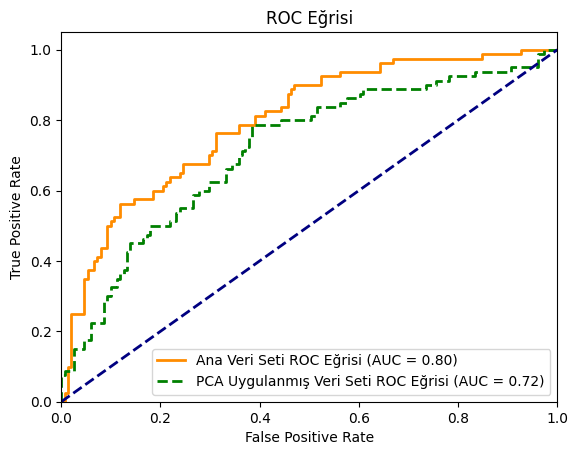

In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Ana Veri Seti İçin Çoklu Doğrusal Regresyon
# Confusion matrix
linear_cm = confusion_matrix(y_test, linear_predictions.round())
print("Çoklu Doğrusal Regresyon (Ana Veri Seti) için Confusion Matrix:")
print(linear_cm)

# PCA Uygulanmış Veri Seti İçin Çoklu Doğrusal Regresyon
# Confusion matrix
linear_cm_pca = confusion_matrix(y_pca_test, linear_predictions_pca.round())
print("\nÇoklu Doğrusal Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:")
print(linear_cm_pca)

# ROC Eğrilerini Çizme
fpr, tpr, _ = roc_curve(y_test, linear_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Ana Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc)

fpr_pca, tpr_pca, _ = roc_curve(y_pca_test, linear_predictions_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)
plt.plot(fpr_pca, tpr_pca, color='green', lw=2, linestyle='--', label='PCA Uygulanmış Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_pca)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


Çoklu Doğrusal Regresyon modeli hem ana veri seti üzerinde hem de PCA uygulanmış veri seti üzerinde değerlendirdim. Her iki durumda da, modelin performansını değerlendirmek için confusion matrix ve ROC eğrisi kullandım.

Confusion matrixlere baktığımda, PCA uygulandığında, false positive ve false negative değerlerde bir azalma olduğu gözlemledim.

ROC eğrisi karşılaştırması yapıldığında, turuncu çizgi ana veri seti için ve yeşil çizgi PCA uygulanmış veri seti için gösterilmiş. Her iki durumda da eğrilerin yüzde elli üzerinde olduğu gözlemledim.Yani en kötü sonuç olan arada kalmışlık söz konusu değil. ROC eğrisi altında kalan alanın (AUC) daha büyük olan eğri, modelin daha iyi performans gösterdiğini gösterir. Bu durumda, turuncu eğri yani ana veri seti için daha fazla alanı kapsadığı için, ana veri seti üzerinde modelin daha iyi bir performans sergilediğini gördüm. Eğrilerin birbirine en yakın olduğu nokta, false positive değerinin yaklaşık 0.4 ve true positive değerinin yaklaşık 0.8 olduğu noktadır. Bu da modelin hassasiyet ve özgüllük dengesinin iyi olduğunu gösterdi.





Multinominal Lojistik Regresyon (Ana Veri Seti) için Confusion Matrix:
[[121  30]
 [ 30  50]]

Multinominal Lojistik Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:
[[130  21]
 [ 46  34]]


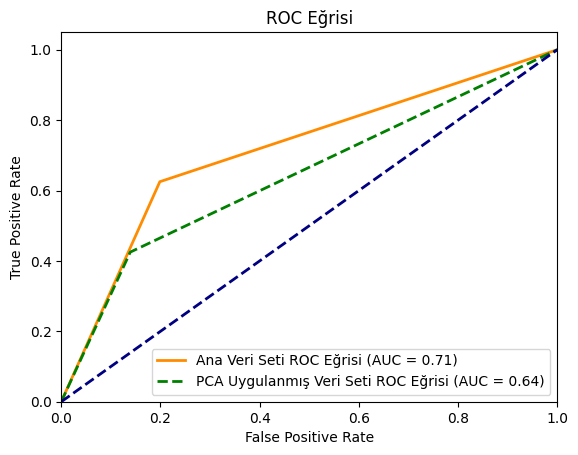

In [26]:
# Ana Veri Seti İçin Multinominal Lojistik Regresyon
# Confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_predictions)
print("Multinominal Lojistik Regresyon (Ana Veri Seti) için Confusion Matrix:")
print(logistic_cm)

# PCA Uygulanmış Veri Seti İçin Multinominal Lojistik Regresyon
# Confusion matrix
logistic_cm_pca = confusion_matrix(y_pca_test, logistic_predictions_pca)
print("\nMultinominal Lojistik Regresyon (PCA Uygulanmış Veri Seti) için Confusion Matrix:")
print(logistic_cm_pca)

# ROC Eğrilerini Çizme
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_predictions)
roc_auc_log = auc(fpr_log, tpr_log)
plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Ana Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_log)

fpr_log_pca, tpr_log_pca, _ = roc_curve(y_pca_test, logistic_predictions_pca)
roc_auc_log_pca = auc(fpr_log_pca, tpr_log_pca)
plt.plot(fpr_log_pca, tpr_log_pca, color='green', lw=2, linestyle='--', label='PCA Uygulanmış Veri Seti ROC Eğrisi (AUC = %0.2f)' % roc_auc_log_pca)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


Confusion matrix karşılaştırma sonuçlarına göre, PCA uygulanmış veri seti için Multinominal Lojistik Regresyon modelinin yanlış sınıflandırma oranlarının biraz daha yüksek olduğu görülmektedir. Özellikle, yanlış negatiflerin (gerçek pozitiflerin yanlışlıkla negatif olarak sınıflandırılması) sayısının daha yüksek olduğu fark edilmekte.

Multinominal Lojistik Regresyon modeli için ROC eğrisi, ana veri seti ve PCA uygulanmış veri seti için de az da olsa benzer bir eğilim göstermektedir. Her iki eğri de başlangıçta hızlı bir şekilde yükselir ve sonra daha yavaş bir şekilde artar. Bu, modelin başlangıçta yüksek bir duyarlılığa sahip olduğunu ancak daha sonra özgüllüğü artırmak için daha fazla yanlış pozitif kabul ettiğini gösterir. Ana veri seti için ROC eğrisi, PCA uygulanmış veri seti için ROC eğrisinden biraz daha yüksektir, bu da modelin doğruluğunun biraz daha yüksek olduğunu gösterir.


**Null(0) değerlerini Veri setinden Kaldırarak Oluşan Veri setinin Çoklu Doğrusal ve Multinominal Lojistik Regresyon analizi**

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini kopyalayarak başlayalım
normalized_df = null_df.copy()

# Verileri normalleştirme
scaler = StandardScaler()
normalized_df.iloc[:, :-1] = scaler.fit_transform(normalized_df.iloc[:, :-1])

# Veriyi bağımsız ve bağımlı değişkenlere ayırma
X = normalized_df.drop(columns=['diabet'])
y = normalized_df['diabet']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modeli oluşturma ve eğitme
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Multinominal Lojistik Regresyon modeli oluşturma ve eğitme
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
linear_predictions = linear_regression.predict(X_test)
logistic_predictions = logistic_regression.predict(X_test)

# Çoklu Doğrusal Regresyon performans metrikleri
print("\nÇoklu Doğrusal Regresyon Performans Metrikleri:")
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, linear_predictions))
print("R-kare değeri:", r2_score(y_test, linear_predictions))
linear_accuracy = accuracy_score(y_test, (linear_predictions > 0.5).astype(int))
print("Doğruluk (Accuracy) değeri:", linear_accuracy)

# Multinominal Lojistik Regresyon performans metrikleri
print("\nMultinominal Lojistik Regresyon Performans Metrikleri:")
print(classification_report(y_test, logistic_predictions))
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Doğruluk (Accuracy) değeri:", logistic_accuracy)

# Konfüzyon matrisi
print("\nKonfüzyon Matrisi (Çoklu Doğrusal Regresyon):")
print(confusion_matrix(y_test, (linear_predictions > 0.5).astype(int)))

print("\nKonfüzyon Matrisi (Multinominal Lojistik Regresyon):")
print(confusion_matrix(y_test, logistic_predictions))



Çoklu Doğrusal Regresyon Performans Metrikleri:
Ortalama Kare Hata (MSE): 0.17292031271841704
R-kare değeri: 0.23615887359540932
Doğruluk (Accuracy) değeri: 0.7445887445887446

Multinominal Lojistik Regresyon Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Doğruluk (Accuracy) değeri: 0.7402597402597403

Konfüzyon Matrisi (Çoklu Doğrusal Regresyon):
[[125  26]
 [ 33  47]]

Konfüzyon Matrisi (Multinominal Lojistik Regresyon):
[[123  28]
 [ 32  48]]


Kodlarımın en başında eksik değerlerin oluşabileceği 0 değerlerini en çok tekrar edilen verilerle doldurarak null_df değişkenine atamıştım.Bu veri seti üzerinden Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemlerini uyguladım ve sonuçlarını aldım.Sonuçlara göre her iki modelin de yüksek bir doğruluk elde ettiğini gördüm.


MLR modelinin doğruluk değeri ÇDR modelinden biraz daha düşüktür.
MLR modelinin F1 puanı ÇDR modelinden daha yüksektir.
MLR modeli, 0 sınıfı örnekleri (gerçekte 0 olan) daha doğru tahmin ederken, ÇDR modeli 1 sınıfı örnekleri (gerçekte 1 olan) daha doğru tahmin etmektedir.


Her iki model de veri setindeki ilişkiyi iyi yakalamakta olduğunu fark ettim.
MLR modelinin F1 puanı daha yüksek olduğu için genel olarak daha iyi bir performans gösterdiği söyleyebilirim.

# ***Oluşturduğum 3 veri setini karşılaştırmam gerekirse:***




*  MLR modeli her üç veri setinde de ÇDR modelinden çok daha yüksek bir doğruluk elde etmektedir. Bu, MLR modelinin bağımlı değişkeni tahmin etmede ÇDR modelinden çok daha başarılı olduğu anlamına geldi.

* Null veri seti ve ana veri seti üzerinde MLR modeli çok benzer bir doğruluk elde etmektedir. Bu, eksik değerler ve aykırı değerleri temizlemenin doğruluk üzerinde önemli bir etkisi olmadığını gösterdi.

*   PCA uygulanmış veri seti üzerinde MLR modeli, diğer iki veri setine göre biraz daha düşük bir doğruluk elde etmektedir. Bu, PCA'nın veri setindeki varyansı azaltırken bazı bilgilerin kaybedilmiş olabileceğini gösterdi.

*  Ana veri seti için R-Kare değeri, PCA uygulanmış veri setinden daha yüksektir. Bu, ana veri setinin model tarafından daha iyi açıklandığı anlamına geldi.
*   PCA uygulanmış veri seti üzerinde MLR modeli, diğer iki veri setine göre daha yüksek bir hassasiyet elde etmektedir. Bu, PCA'nın modelin 1 sınıfı (gerçekte 1 olan örnekleri) tahmin etme yeteneğini artırmış olabileceğini gösterdi.

* Null veri seti üzerinde MLR modeli, diğer iki veri setine göre daha yüksek bir özgüllük elde etmektedir. Bu, PCA'nın modelin 0 sınıfı (gerçekte 0 olan örnekleri) tahmin etme yeteneğini azaltmış olabileceğini gösterdi.

*   Her üç veri setinde de MLR modeli için F1 puanı oldukça yüksektir. Bu, MLR modelinin hem hassasiyet hem de özgüllük açısından iyi bir performans gösterdiği anlamına gelir.

**Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyonun uyguladığım bu 3 veri setine göre:**



> Eksik değerler ve aykırı değerler temizlenerek ana veri seti oluşturmak, modelin doğruluğu üzerinde önemli bir etkiye sahip olmadığını gördüm.
PCA, modelin doğruluğunu ve R-Kare değerini bir miktar düşürebilir, ancak hassasiyetini ve F1 puanını da iyileştirebilir.
MLR modeli her üç veri setinde de ÇDR modelinden çok daha iyi bir performans göstermektedir.
Sonuç olarak:
MLR modeli, bu veri seti için en uygun model olarak görünmektedir.
PCA, modelin performansını bazı açılardan iyileştirebilir, ancak diğer açılardan da düşürebilir.












# Karar Ağaçları

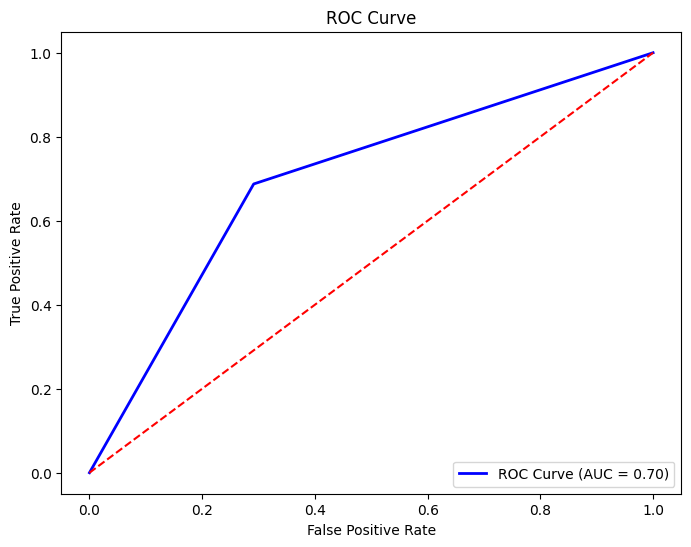

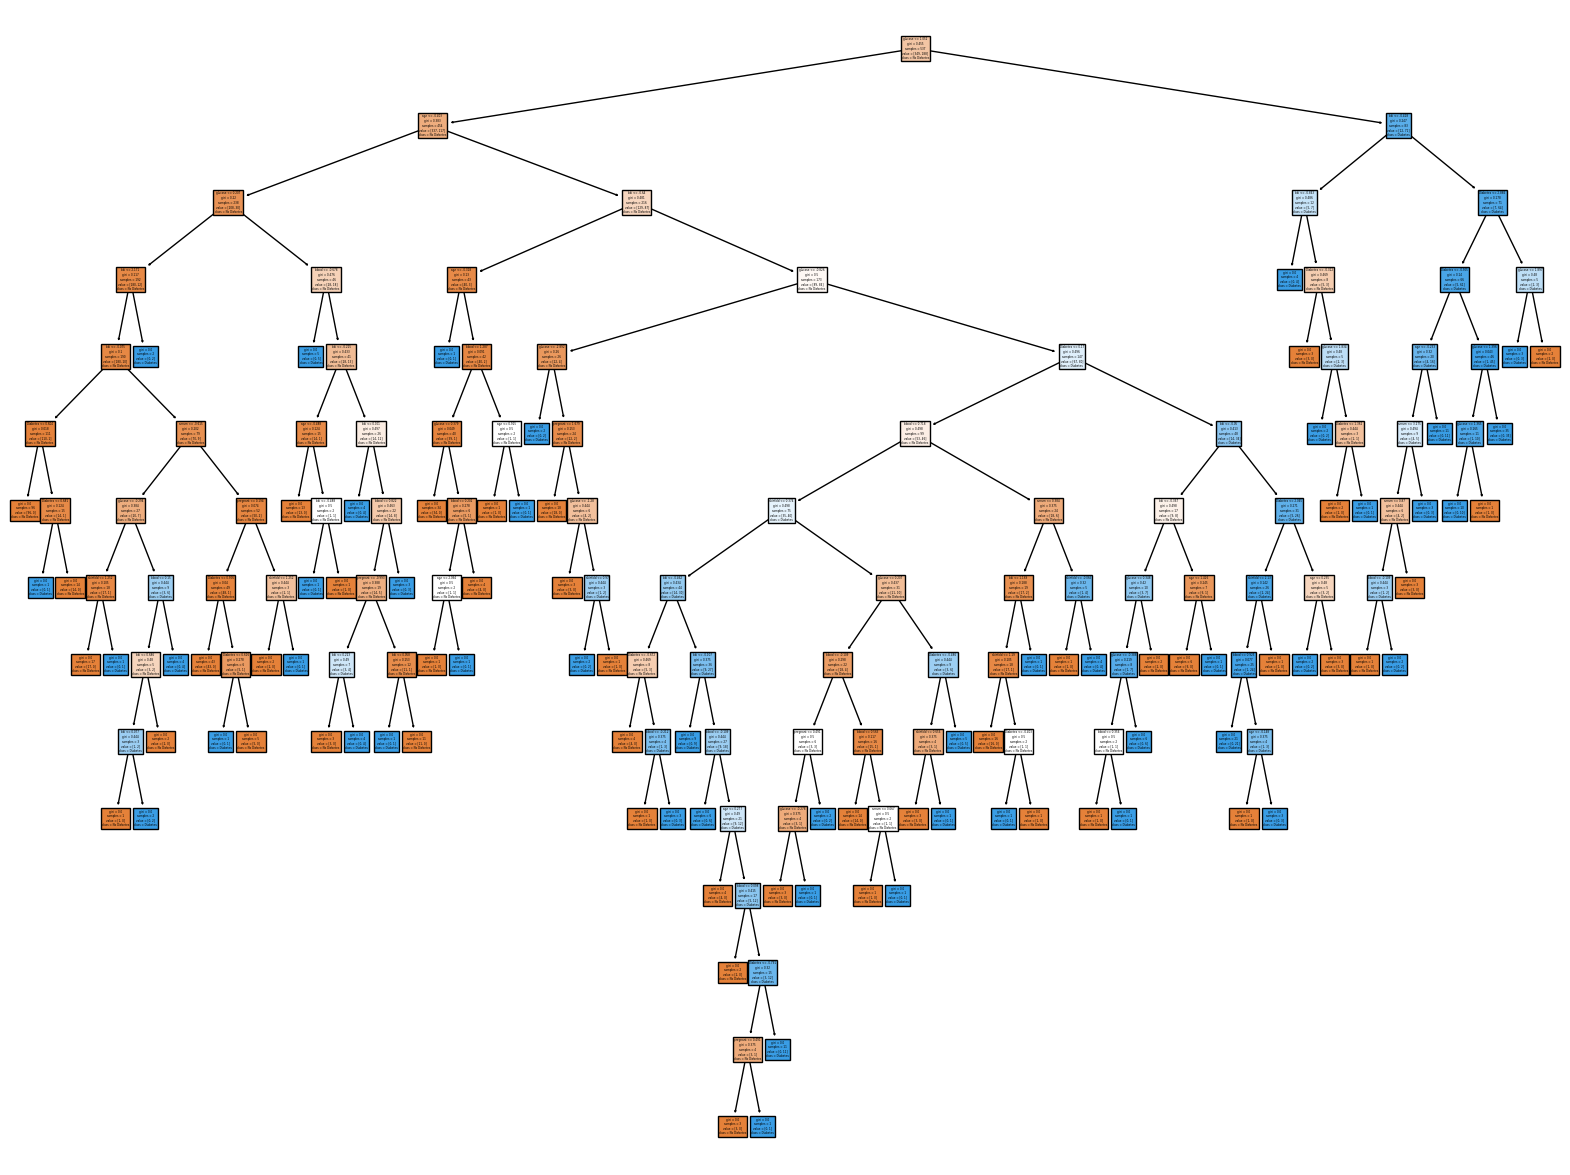

Karar Ağacı Sınıflandırma Performans Metrikleri:
Doğruluk (Accuracy): 0.7012987012987013
Confusion Matrix:
[[107  44]
 [ 25  55]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

# CSV dosyasını okuma ve sütunları boşluklarla ayırma
df = pd.read_csv('veri.csv')

# Veri setini normalleştirme
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)

# Bağımlı ve bağımsız değişkenleri ayırma
X = normalized_df[:, :-1]
y = df['diabet']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = decision_tree.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# ROC eğrisi ve AUC hesaplama
y_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
tree.plot_tree(decision_tree, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

# Sonuçları yazdırma
print("Karar Ağacı Sınıflandırma Performans Metrikleri:")
print("Doğruluk (Accuracy):", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Sınıflandırma Raporu:")
print(classification_rep)


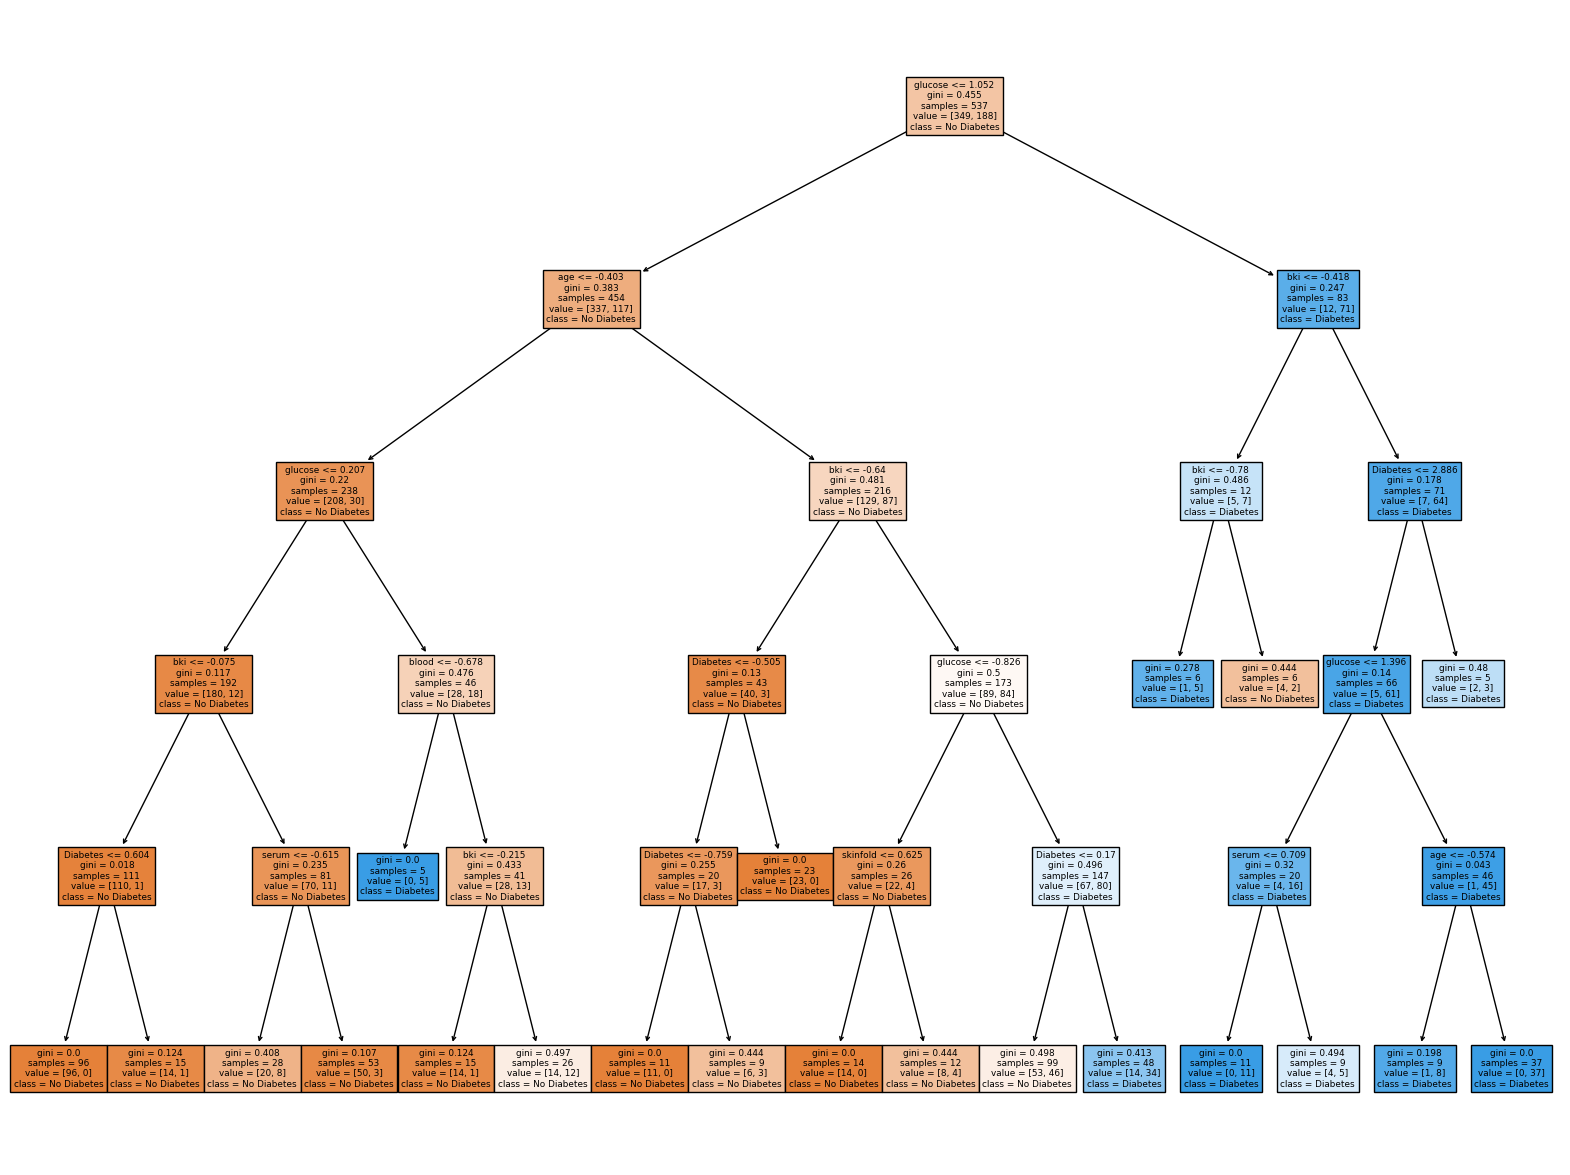

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Karar Ağacı sınıflandırıcı modeli oluşturma ve eğitme
# max_depth parametresi ile ağacın maksimum derinliğini belirleyebiliriz
# min_samples_split ve min_samples_leaf parametreleri ile minimum bölünme ve yaprak düğümü örnek sayısını belirleyebiliriz
pruned_decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pruned_decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_pruned = pruned_decision_tree.predict(X_test)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 15))
plot_tree(pruned_decision_tree, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()
